This cell will import all of the necessary libraries for this lab. These 
include the pyserial library which is used to communicate with the
microcontroller, NumPy which is used to load data from a CSV file, and
pyplot from matplotlib which is a plotting package with almost identical
commands to MATLAB. Run this cell first.

In [26]:
from serial import Serial
import numpy as np
from matplotlib import pyplot as plt

This cell will collect the data from the microcontroller over the serial port.
See the comments for details on how this works. You will have to change the
`serport` variable to match your PC.

In [27]:
# Name of the serial port, should be something lik 'COMx' for Windows and
# '/dev/tty.usbmodemXXXX' for Mac/Linux
# Windows: Open Device Manager and look under "Ports (COM & LPT)" for a 
# "USB Serial Device"
# Mac/Linux: Open terminal and run "ls /dev/tty.*" to find the port matching
# the format above.
serport = 'COM12'

# Filename to store data in
filename = 'data.csv'

# Open the serial port, and give it the name ser.
with Serial(serport, baudrate=115200, timeout=5) as ser:
    # Write ^B^D to stop program and reset the microcontroller
    ser.write(b'\x02\x04')

    # Open the data file for writing, and give it the name datafile
    with open(filename, 'w') as datafile:
        while True:
            # Read the current line and decode from bytes to a string
            line = ser.readline().decode()
            # Print the line so we can see what the microcontroller is doing
            # print(line, end='')
            # If the line starts with END, then we know the data is complete
            if line[:3] == 'END':
                print("Test completed.")
                break
            if line[:18] == 'MOTOR INITIALIZED.':
                print(line, end='')
            if line[:20] == 'ENCODER INITIALIZED.':
                print(line, end='')
            # If the line has a comma, it is a line of CSV data.
            if ',' in line:
                datafile.write(line.strip() + '\n')

MOTOR INITIALIZED.
ENCODER INITIALIZED.
Test completed.


This cell will load the csv data file just saved into a NumPy array, which is
very similar to an array from MATLAB. Then it will split off the collumns of
data into separate arrays (time and velocity).

In [28]:
data = np.genfromtxt('data.csv', delimiter=',')
times = data[:,0]
velocities = data[:,1]

This cell plots the step response. This uses `matplotlib.pyplot`, which is
very similar to MATLAB.

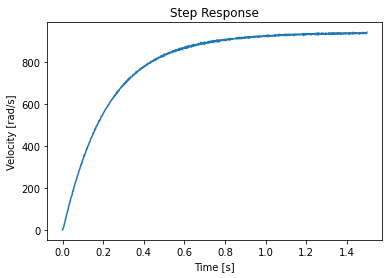

In [29]:
plt.plot(times, velocities)
plt.xlabel("Time [s]")
plt.ylabel("Velocity [rad/s]")
plt.title('Step Response')
plt.show()

Write your code here to plot the data. Label the axes, with units, and give
the plot a title. Plotting functions are almost the same as matlab, but must be
prefixed with `plt.` to call them from `matplotlib.pyplot`.